# **2018 Painting Data, Treatment II**
***Objective:* averaging the normalized individual XANES spectra for each particle within a given sample, as determined by the XRF maps by the co-location of Al, Si, and S**

### Program: 
[Jupyter notebook >=5.5, Python >=3.4]

### Input: 
- individual normalized XANES spectra, type = .dat, [dataset42] ()
> c_2018_MH0264X07b_003_060.dat <br> c_2018_S18500_002_051.dat <br> c_2018_S18506_002_059.dat

### Steps:
- follow script below

### Output:
- averaged normalized XANES spectra per particle for each sample, type = .csv (tab-delimited), [dataset43] ()
> c_2018_MH0264X07b_vals_003to011skip8_date_1.csv <br>
c_2018_MH0264X07b_vals_012to018_date_1.csv <br>
c_2018_MH0264X07b_vals_019to022_date_1.csv <br>
c_2018_MH0264X07b_vals_023to025_date_1.csv <br>
c_2018_MH0264X07b_vals_026to031_date_1.csv <br>
c_2018_MH0264X07b_vals_032to033_date_1.csv <br>
c_2018_MH0264X07b_vals_034to037_date_1.csv <br>
c_2018_MH0264X07b_vals_038to039_date_1.csv <br>
c_2018_MH0264X07b_vals_040only_date_1.csv <br>
c_2018_MH0264X07b_vals_041only_date_1.csv <br>
c_2018_MH0264X07b_vals_042to045_date_1.csv <br>
c_2018_MH0264X07b_vals_046to049_date_1.csv <br>
c_2018_MH0264X07b_vals_050to054_date_1.csv <br>
c_2018_MH0264X07b_vals_055to057_date_1.csv <br> <br>
c_2018_S18500_vals_002to003_date_1.csv <br>
c_2018_S18500_vals_004to010_date_1.csv <br>
c_2018_S18500_vals_011to013_date_1.csv <br>
c_2018_S18500_vals_014to016_date_1.csv <br>
c_2018_S18500_vals_017to024_date_1.csv <br>
c_2018_S18500_vals_025to027_date_1.csv <br>
c_2018_S18500_vals_028to031_date_1.csv <br>
c_2018_S18500_vals_032to033_date_1.csv <br>
c_2018_S18500_vals_034to039_date_1.csv <br>
c_2018_S18500_vals_040to041_date_1.csv <br>
c_2018_S18500_vals_042to043and051_date_1.csv <br>
c_2018_S18500_vals_044to045_date_1.csv <br>
c_2018_S18500_vals_046only_date_1.csv <br>
c_2018_S18500_vals_048to049_date_1.csv <br>
c_2018_S18500_vals_050only_date_1.csv <br> <br>
c_2018_S18506_vals_002to007_date_1.csv <br>
c_2018_S18506_vals_008to015_date_1.csv <br>
c_2018_S18506_vals_016to022_date_1.csv <br>
c_2018_S18506_vals_023to025_date_1.csv <br>
c_2018_S18506_vals_026to030_date_1.csv <br>
c_2018_S18506_vals_031to034_date_1.csv <br>
c_2018_S18506_vals_035to038_date_1.csv <br>
c_2018_S18506_vals_039to047_date_1.csv <br>
c_2018_S18506_vals_048to054_date_1.csv <br>
c_2018_S18506_vals_055to059_date_1.csv

 
### Notes:
- all comments are made with '##' 
- aspects that can be changed depending on the sample, etc. are with '#'

### Additional Notes:
- samples of interest
    - MH0264x07b, Mauritshuis, Van der Weyden, *The Lamentation of Christ*
    - 18500, Louvre/C2RMF, Johan Maelwael, *Pieta with the Holy Trinity*
    - 18506, Louvre/C2RMF, Henri Bellechose, *The Last Communion and Martyrdom of Saint Denis*
- output filename components separated by underscores
    - c for constant edge parameters for normalization
    - beamtime year
    - accession/sample number
    - 'vals' for values
    - range of individual scans included in the average
    - 'date' is date file was written
    - index

In [1]:
%pylab inline
import re
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
##standards for figures
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
##prepare output
date = datetime.datetime.now().strftime("%Y%m%d")
try:
    os.mkdir('dataset_43')
except OSError:
    pass

In [4]:
##function to read in spectra per filename (ie sample)
def read_multi(filename):
    txt = open(filename).read()
    starts = []
    for match in re.finditer(r'#S', txt, re.DOTALL | re.MULTILINE):
        starts.append(match.start())
    
    starts.append(len(txt))
    parts = []

    for start, stop in zip(starts[:-1], starts[1:]):
        parts.append( array(([ [float(x) for x in line.split()] for line in (txt[start:stop-1].splitlines()[4:]) ])) )

    parts = array(parts)   

    return parts

Start here for each new file import...

In [5]:
##Choose the desired file (from 'dataset_42')

filename = 'c_2018_S18500_002_051.dat'
#filename = 'c_2018_S18506_002_059.dat'
#filename = 'c_2018_MH0264X07b_003_060.dat'

filename = os.path.join('dataset_42', filename)

In [6]:
##preparation for saving
basename, ext = os.path.splitext(os.path.basename(filename))
savename, first, last = re.match('(.+)_([0-9]+)_([0-9]+)$', basename).groups()
first, last = int(first), int(last) 
savename, first, last

('c_2018_S18500', 2, 51)

In [7]:
##preparation for plotting
scans = [ '{}'.format(x).zfill(3) for x in range(first, last+1) ]
columns = ['energy'] + ['s{}'.format(x) for x in scans]
columns

['energy',
 's002',
 's003',
 's004',
 's005',
 's006',
 's007',
 's008',
 's009',
 's010',
 's011',
 's012',
 's013',
 's014',
 's015',
 's016',
 's017',
 's018',
 's019',
 's020',
 's021',
 's022',
 's023',
 's024',
 's025',
 's026',
 's027',
 's028',
 's029',
 's030',
 's031',
 's032',
 's033',
 's034',
 's035',
 's036',
 's037',
 's038',
 's039',
 's040',
 's041',
 's042',
 's043',
 's044',
 's045',
 's046',
 's047',
 's048',
 's049',
 's050',
 's051']

In [8]:
##reading in file
parts = read_multi(filename)
c_[parts[0,:,0], parts[:,:,1].T].shape

(212, 51)

In [9]:
print(len(columns))
print(parts.shape) ##(number of spectra, number of signals measured, number of points per signal measured(x,y))

51
(50, 212, 2)


In [10]:
##checks to make sure all have the same x-values; output should be 0
parts[:,:,0].ptp(0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
##puts spectra into dataframe with spectra #s as column names

##if cell above outputs all 0s, then all x-values (ie. energies recorded) are equivalent
##for plotting, need only one energy axis from any spectrum
##defining an array of energy values
x = parts[0, :, 0]*1000 ##energies, in eV
x.shape

##defining an array of intensity values for all spectra
y = parts[:,:,1].T
y.shape

df = pd.DataFrame(c_[x, y], columns=columns)
df

,energy,s002,s003,s004,s005,s006,s007,s008,s009,s010,...,s042,s043,s044,s045,s046,s047,s048,s049,s050,s051
0,2463.12,-0.015766,0.019872,0.000148,0.000846,-0.008579,-0.003966,0.004150,-0.001354,-0.009575,...,0.003419,0.011346,0.000971,-0.014501,0.002286,-0.008732,0.004674,0.008375,-0.005112,-0.014490
1,2463.36,0.015415,0.001370,0.009566,-0.000302,-0.006275,-0.002117,-0.000893,-0.000748,0.007105,...,-0.006013,-0.001513,-0.003031,0.001425,-0.012087,-0.000079,-0.006614,-0.005149,0.003265,-0.003466
2,2463.60,0.003696,-0.005634,0.008293,-0.001898,0.003932,0.001750,0.012274,-0.002049,-0.000103,...,0.008191,-0.012020,-0.002669,-0.014501,-0.010273,0.003908,0.001243,0.000288,-0.004761,0.001137
3,2463.84,0.011394,-0.012985,-0.005189,0.006879,-0.002905,0.006267,-0.007714,0.000314,-0.004928,...,0.001570,-0.002447,0.002320,0.003930,0.002129,-0.006030,0.004040,-0.006930,-0.002434,0.010500
4,2464.08,0.001363,-0.006224,0.004720,0.004195,-0.011824,-0.011508,-0.007679,-0.014959,0.009935,...,-0.003763,0.005722,-0.007860,-0.001367,0.003210,0.012285,-0.000331,0.008225,-0.011979,-0.008125
5,2464.32,-0.003199,0.002372,-0.013842,0.002041,-0.004019,0.000764,0.011858,0.013637,-0.000776,...,0.002621,-0.002054,0.011512,0.017767,0.009367,-0.009662,-0.006672,0.003137,0.021245,0.017343
6,2464.56,0.002863,0.001514,-0.002034,-0.012129,0.024950,0.010385,0.001487,-0.000315,-0.009575,...,-0.001227,0.002463,-0.002269,0.000546,-0.000420,-0.000103,-0.000128,-0.009238,0.011503,-0.009014
7,2464.80,-0.015766,-0.000286,-0.001661,0.000369,0.004720,-0.001575,-0.013482,0.005475,0.007916,...,-0.004797,-0.001497,0.001026,0.006702,0.005787,0.008413,0.003788,0.001292,-0.011727,0.006115
8,2465.04,0.019271,0.015156,-0.004290,0.008568,0.013113,0.012618,-0.003624,0.019996,0.014105,...,0.002786,-0.006895,-0.014577,-0.003227,0.016041,0.014328,-0.002076,-0.000088,-0.005912,-0.014490
9,2465.28,0.012330,-0.006547,-0.006510,0.020343,-0.007382,0.002954,0.005326,0.008418,-0.001728,...,0.001070,0.010040,0.011634,0.007375,-0.001842,-0.004357,0.006788,0.006669,-0.002834,-0.014490


In [12]:
##making dataframes for plotting
x_plot = df[['energy']]
y_plot = df.iloc[:,1:25]

Repeat the next cells for a given sample for each set of spectra to be averaged; then return to the top to load a new sample

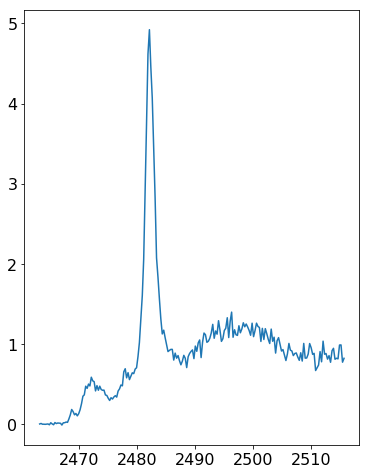

In [13]:
##Choose spectra from a given lazurite particles and averaged
##based on colocation of Si, Al, and S in XRF map of sample

##making an array of only certain columns of df from which to take their mean

##for sample 'c_2018_S18500_002_051.dat'
wanted = df[['s002', 's003']]
#wanted = df[['s004', 's005', 's006', 's007', 's008', 's009', 's010']]
#wanted = df[['s011', 's012', 's013']]
#wanted = df[['s014', 's015', 's016']]
#wanted = df[['s017', 's018', 's019', 's020', 's021', 's022', 's023', 's024']]
#wanted = df[['s025', 's026', 's027']]
#wanted = df[['s028', 's029', 's030', 's031']]
#wanted = df[['s032', 's033']]
#wanted = df[['s034', 's035', 's036', 's037', 's038', 's039']]
#wanted = df[['s040', 's041']]
#wanted = df[['s042', 's043', 's051']]
#wanted = df[['s044', 's045']]
#wanted = df[['s046']]
#wanted = df[['s048', 's049']]
#wanted = df[['s050']]


##for sample 'c_2018_S18506_002_059.dat'
#wanted = df[['s002', 's003', 's004', 's005', 's006', 's007']]
#wanted = df[['s008', 's009', 's010', 's011', 's012', 's013', 's014', 's015']]
#wanted = df[['s016', 's017', 's018', 's019', 's020', 's021', 's022']]
#wanted = df[['s023', 's024', 's025']]
#wanted = df[['s026', 's027', 's028', 's029', 's030']]
#wanted = df[['s031', 's032', 's033', 's034']]
#wanted = df[['s035', 's036', 's037', 's038']]
#wanted = df[['s039', 's040', 's041', 's042', 's043', 's044', 's045', 's046', 's047']]
#wanted = df[['s048', 's049', 's050', 's051', 's052', 's053', 's054']]
#wanted = df[['s055', 's056', 's057', 's058', 's059']]


##for sample 'c_2018_MH0264X07b_003_060.dat'
#wanted = df[['s003', 's004', 's005', 's006', 's007', 's009', 's010', 's011']] ##s008 had no signal, therefore skipped
#wanted = df[['s012', 's013', 's014', 's015', 's016', 's017', 's018']]
#wanted = df[['s019', 's020', 's021', 's022']]
#wanted = df[['s023', 's024', 's025']]
#wanted = df[['s026', 's027', 's028', 's029', 's030', 's031']]
#wanted = df[['s032', 's033']]
#wanted = df[['s034', 's035', 's036', 's037']]
#wanted = df[['s038', 's039']]
#wanted = df[['s040']]
#wanted = df[['s041']]
#wanted = df[['s042', 's043', 's044', 's045']]
#wanted = df[['s046', 's047', 's048', 's049']]
#wanted = df[['s050', 's051', 's052', 's053', 's054']]
#wanted = df[['s055', 's056', 's057']]

##taking the mean of the spectra selected above
y_mn = wanted.T.mean().values  ##sames as mean(axis=1) without Transpose

plt.figure(figsize=(6,8))
tmp = plot(x, y_mn) ##just to see

In [14]:
frames = [pd.DataFrame(df['energy']), pd.DataFrame(wanted), pd.DataFrame(y_mn, columns = {'mean'})]
save_bits = pd.concat(frames, axis = 1)
save_bits

,energy,s002,s003,mean
0,2463.12,-0.015766,0.019872,0.002053
1,2463.36,0.015415,0.001370,0.008392
2,2463.60,0.003696,-0.005634,-0.000969
3,2463.84,0.011394,-0.012985,-0.000796
4,2464.08,0.001363,-0.006224,-0.002431
5,2464.32,-0.003199,0.002372,-0.000413
6,2464.56,0.002863,0.001514,0.002188
7,2464.80,-0.015766,-0.000286,-0.008026
8,2465.04,0.019271,0.015156,0.017214
9,2465.28,0.012330,-0.006547,0.002891


In [15]:
##making a list of the column names so my output csv has the scan number, etc as the header
head_bits = list(save_bits.columns.values)

##preparation for saving
first_spec = head_bits[1][1:]

##for single spectra (ie 'average' of 1 file)
if head_bits[1][1:] == head_bits[-2][1:]:
    last_spec = 'only'

elif head_bits[1][1:] == '042' and head_bits[-2][1:] == '051':
    last_spec = 'to{}and{}'.format(head_bits[2][1:],head_bits[-2][1:]) ##special case for average of non-consequetive spectra (from 'c_2018_S18500_002_051.dat')
    
elif head_bits[1][1:] == '003' and head_bits[-2][1:] == '011':
    last_spec = 'to{}skip8'.format(head_bits[-2][1:]) ##special case for average of non-consequetive spectra (from 'c_2018_MH0264X07b_003_060.dat')

else:
    last_spec = 'to{}'.format(head_bits[-2][1:])
last_spec

print(head_bits)
print(first_spec)
print(last_spec)

['energy', 's002', 's003', 'mean']
002
to003


In [16]:
##saving csv of mean data and the individual spectra that led to that mean
savefmt = os.path.join('dataset_43',
                       '{}{}{}{}{}{}{}{{:d}}.csv'.format(savename, '_vals_', first_spec, last_spec, '_', date, '_'))
i = 1
while os.path.exists(savefmt.format(i)):
    i += 1
np.savetxt(savefmt.format(i), save_bits, delimiter =',', header = ','.join(head_bits), comments = '')

##note: comments = '' is so that there is no '#' at the start of my headers

### end